## Solar radiation prediction

# Import Data

In [ ]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import plotly as py
import plotly.graph_objs as go
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [ ]:
df=pd.read_csv('SolarPrediction.csv')

In [ ]:
df.shape

(32686, 11)

In [ ]:
df.head(5)

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00


In [ ]:
d1=df[df.Data=="9/29/2016 12:00:00 AM"]

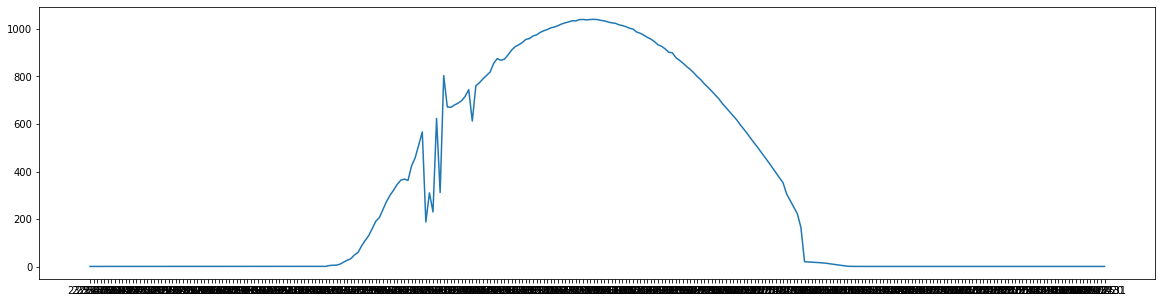

In [ ]:
plt.figure(figsize = (20, 5))
plt.plot(d1['Time'], d1['Radiation'])
plt.show()

In [ ]:
df.Radiation.max()

1601.26

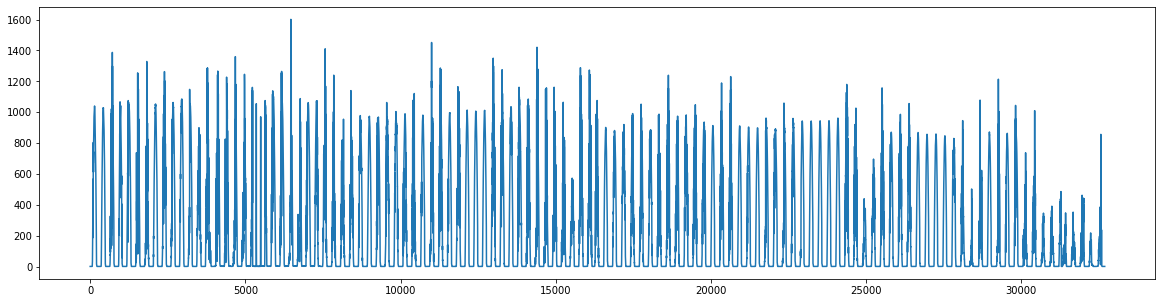

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (20, 5))
plt.plot(df['Radiation'])
plt.show()

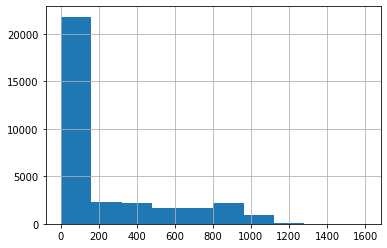

In [ ]:
df['Radiation'].hist()

# Investigate Existing Correlations

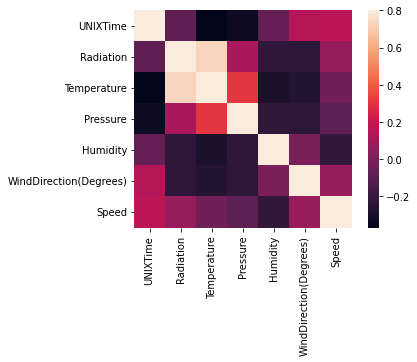

In [ ]:
corrmat = df.corr()
sns.heatmap(corrmat, vmax=.8, square=True)

# Checking Relationship between Radiation and Temp

Text(0.5, 0.98, 'Temp vs. Radiation')

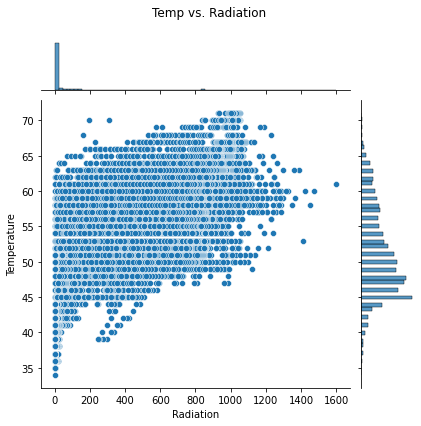

In [ ]:
g = sns.jointplot(x="Radiation", y="Temperature", data=df)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Temp vs. Radiation')

Text(0.5, 0.98, 'Temp vs. Humidity')

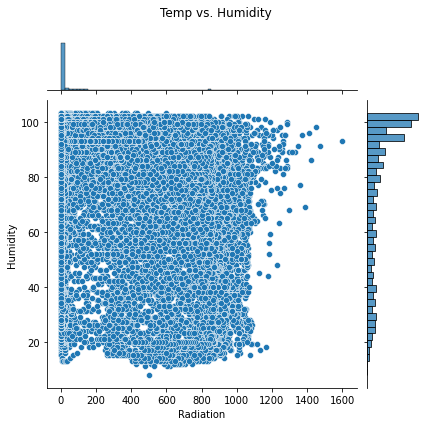

In [ ]:
g = sns.jointplot(x="Radiation", y="Humidity", data=df)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Temp vs. Humidity')

In [ ]:
#drop low radiation values
df = df[df['Radiation'] >= 10]

# Feature Engineering

In [ ]:
#Covert time to_datetime
#Add column 'hour'
df['Time_conv'] =  pd.to_datetime(df['Time'], format='%H:%M:%S')
df['hour'] = pd.to_datetime(df['Time_conv'], format='%H:%M:%S').dt.hour

#Add column 'month'
df['month'] = pd.to_datetime(df['UNIXTime'].astype(int), unit='s').dt.month

#Add column 'year'
df['year'] = pd.to_datetime(df['UNIXTime'].astype(int), unit='s').dt.year

#Duration of Day
df['total_time'] = pd.to_datetime(df['TimeSunSet'], format='%H:%M:%S').dt.hour - pd.to_datetime(df['TimeSunRise'], format='%H:%M:%S').dt.hour
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet,Time_conv,hour,month,year,total_time
70,1475208322,9/29/2016 12:00:00 AM,18:05:22,10.96,54,30.44,59,154.16,4.50,06:13:00,18:13:00,1900-01-01 18:05:22,18,9,2016,12
71,1475208022,9/29/2016 12:00:00 AM,18:00:22,19.42,55,30.44,57,58.42,6.75,06:13:00,18:13:00,1900-01-01 18:00:22,18,9,2016,12
72,1475207722,9/29/2016 12:00:00 AM,17:55:22,27.14,55,30.44,53,47.86,4.50,06:13:00,18:13:00,1900-01-01 17:55:22,17,9,2016,12
73,1475207419,9/29/2016 12:00:00 AM,17:50:19,33.75,56,30.44,52,74.56,2.25,06:13:00,18:13:00,1900-01-01 17:50:19,17,9,2016,12
74,1475207122,9/29/2016 12:00:00 AM,17:45:22,49.57,56,30.44,49,25.72,6.75,06:13:00,18:13:00,1900-01-01 17:45:22,17,9,2016,12


# Data Visualization

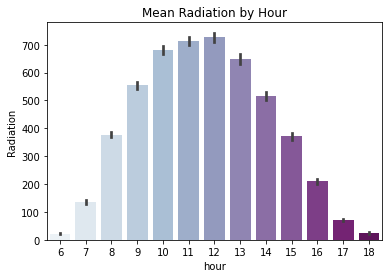

In [ ]:
ax = plt.axes()
sns.barplot(x="hour", y='Radiation', data=df, palette="BuPu", ax = ax)
ax.set_title('Mean Radiation by Hour')
plt.show()

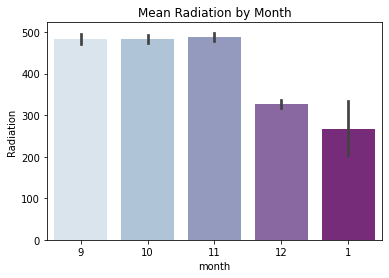

In [ ]:
ax = plt.axes()
sns.barplot(x="month", y='Radiation', data=df, palette="BuPu", ax = ax, order=[9,10,11,12,1])
ax.set_title('Mean Radiation by Month')
plt.show()

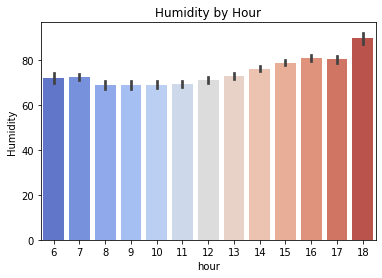

In [ ]:
ax = plt.axes()
sns.barplot(x="hour", y='Humidity', data=df, palette=("coolwarm"), ax = ax)
ax.set_title('Humidity by Hour')
plt.show()

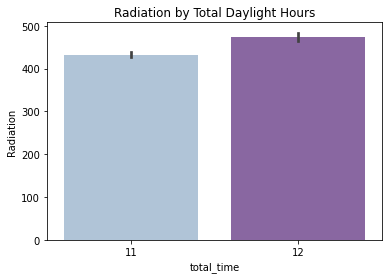

In [ ]:
ax = plt.axes()
sns.barplot(x="total_time", y='Radiation', data=df, palette="BuPu", ax = ax)
ax.set_title('Radiation by Total Daylight Hours')
plt.show()

# Cluster Analysis

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
df = pd.read_csv("SolarPrediction.csv")
X1 = df[['Temperature' , 'Humidity']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_kmeans.py:968: RuntimeWarning: algorithm='elkan' doesn't make sense for a single cluster. Using 'full' instead.
  RuntimeWarning,


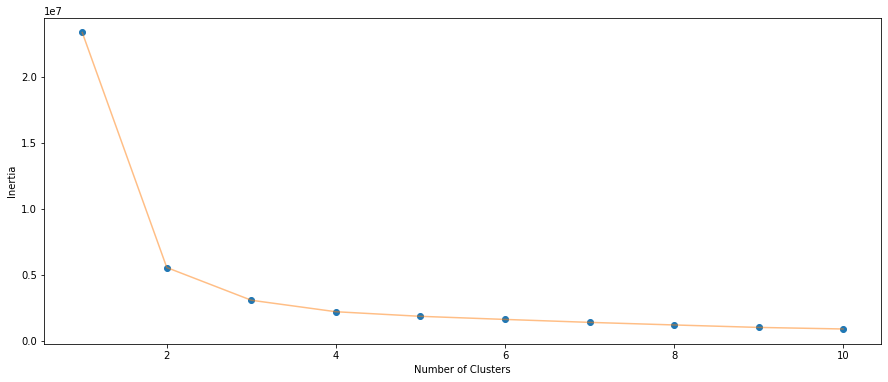

In [ ]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [ ]:
algorithm = (KMeans(n_clusters = 3 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X1)
labels = algorithm.labels_
centroids = algorithm.cluster_centers_

In [ ]:
h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

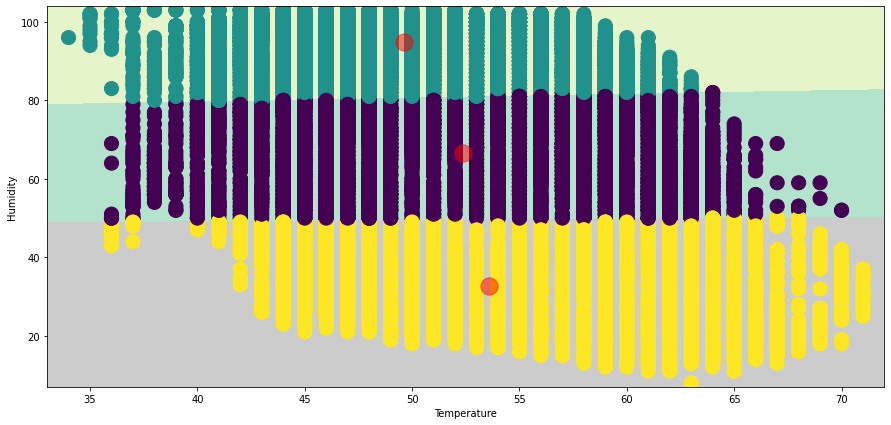

In [ ]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Temperature' ,y = 'Humidity' , data = df , c = labels , 
            s = 200 )
plt.scatter(x = centroids[: , 0] , y =  centroids[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Humidity') , plt.xlabel('Temperature')
plt.show()

# Prediction

In [ ]:
y = df['Radiation']
X = df.drop(['Radiation', 'Data', 'Time', 'TimeSunRise', 'TimeSunSet', 'UNIXTime'], axis=1)

In [ ]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)

**Using LinearRegression**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [ ]:
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [237.06415355 -41.00151497  -7.42570139 -23.06947395  29.47298596]


In [ ]:
lpredictions = lm.predict( X_test)
print(lpredictions)

[  37.21514291 -140.8817665   392.72528864 ...    7.83192002  177.22673814
  109.7260922 ]


Text(0, 0.5, 'Predicted Y')

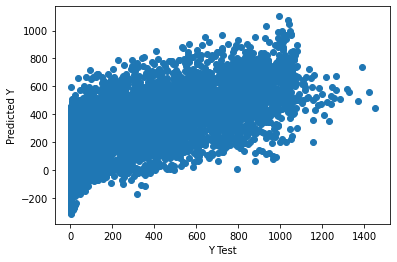

In [ ]:
plt.scatter(y_test,lpredictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [ ]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, lpredictions))
print('MSE:', metrics.mean_squared_error(y_test, lpredictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lpredictions)))

MAE: 158.23737159135644
MSE: 43804.89935349301
RMSE: 209.29620004551685


In [ ]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Temperature,237.064154
Pressure,-41.001515
Humidity,-7.425701
WindDirection(Degrees),-23.069474
Speed,29.472986


**Using RidgeCV**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
from sklearn.linear_model import RidgeCV
ridge = RidgeCV(cv=5)
ridge.fit(X_train,y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), cv=5)

In [ ]:
print('Coefficients: \n', ridge.coef_)

Coefficients: 
 [236.93402177 -40.95274386  -7.451665   -23.08155977  29.45575989]


In [ ]:
rpredictions = ridge.predict( X_test)
print(rpredictions)

[  37.28781199 -140.7404075   392.68352483 ...    7.97609522  177.22398247
  109.79531944]


Text(0, 0.5, 'Predicted Y')

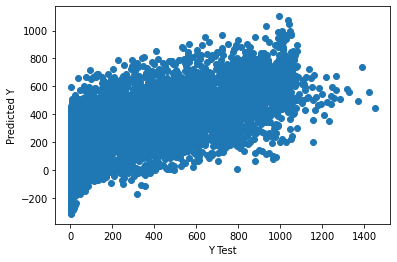

In [ ]:
plt.scatter(y_test,rpredictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [ ]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, rpredictions))
print('MSE:', metrics.mean_squared_error(y_test, rpredictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rpredictions)))

MAE: 158.2329212523707
MSE: 43805.290278491135
RMSE: 209.29713394714972


In [ ]:
coeffecients = pd.DataFrame(ridge.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Temperature,236.934022
Pressure,-40.952744
Humidity,-7.451665
WindDirection(Degrees),-23.081560
Speed,29.455760


**Using SGDRegressor**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
from sklearn import linear_model
sgd = linear_model.SGDRegressor(max_iter=1000)
sgd.fit(X_train,y_train)

SGDRegressor()

In [ ]:
print('Coefficients: \n', sgd.coef_)

Coefficients: 
 [237.66812183 -39.48088446  -9.32492662 -23.05490678  24.4687238 ]


In [ ]:
spredictions = sgd.predict(X_test)
print(spredictions)

[  35.21321669 -149.05445194  397.29988976 ...    4.70441265  180.64662827
  106.1232567 ]


Text(0, 0.5, 'Predicted Y')

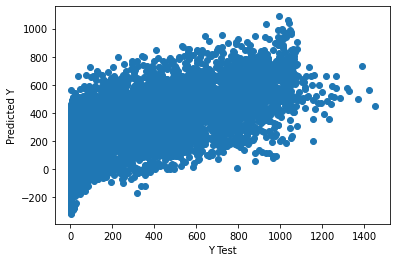

In [ ]:
plt.scatter(y_test,spredictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [ ]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, spredictions))
print('MSE:', metrics.mean_squared_error(y_test, spredictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, spredictions)))

MAE: 158.08878004279194
MSE: 43779.4316530376
RMSE: 209.23534991257478


In [ ]:
coeffecients = pd.DataFrame(sgd.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Temperature,237.668122
Pressure,-39.480884
Humidity,-9.324927
WindDirection(Degrees),-23.054907
Speed,24.468724


> **Using AdaBoostRegressor**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
from sklearn.ensemble import AdaBoostRegressor
abreg = AdaBoostRegressor(random_state=0, n_estimators=100)
abreg.fit(X_train,y_train)

AdaBoostRegressor(n_estimators=100, random_state=0)

In [ ]:
abpredictions = abreg.predict( X_test)
print(abpredictions)

[152.98179644  80.61417301 556.65651915 ...  35.55824304 212.46642753
  35.55824304]


Text(0, 0.5, 'Predicted Y')

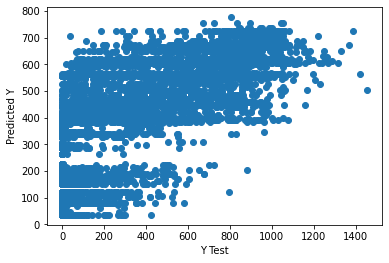

In [ ]:
plt.scatter(y_test,abpredictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [ ]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, abpredictions))
print('MSE:', metrics.mean_squared_error(y_test, abpredictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, abpredictions)))

MAE: 162.83133845782726
MSE: 43438.89045587802
RMSE: 208.4199857400389


**Using XGBoost**

In [ ]:
final_data=df.drop(['UNIXTime','Data','Time','TimeSunRise','TimeSunSet'],axis=1)

In [ ]:
final_y=final_data.pop('Radiation')

In [ ]:
final_x=final_data

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final_x, final_y, test_size=0.33, random_state=42)
import xgboost as xgb

In [ ]:
xgdmat=xgb.DMatrix(X_train,y_train)
our_params={'eta':0.1,'seed':0,'subsample':0.8,'colsample_bytree':0.8,'objective':'reg:linear','max_depth':3,'min_child_weight':1}
final_gb=xgb.train(our_params,xgdmat)
tesdmat=xgb.DMatrix(X_test)
xpredictions=final_gb.predict(tesdmat)
print(xpredictions)

[17:20:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[385.27884  375.82608   17.700964 ...  48.563725  17.700964 487.74847 ]


Text(0, 0.5, 'Predicted Y')

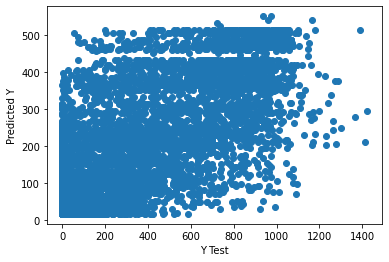

In [ ]:
plt.scatter(y_test,xpredictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [ ]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, xpredictions))
print('MSE:', metrics.mean_squared_error(y_test, xpredictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, xpredictions)))

MAE: 140.17789373424526
MSE: 51326.31031015023
RMSE: 226.55310704148425


**Let`s check if there are any outliers in our dataset**

In [ ]:
Q1 = y.quantile(0.25)
Q3 = y.quantile(0.75)
IQR = Q3 - Q1
Outliers = (y < (Q1 - 1.5 * IQR)) |(y > (Q3 + 1.5 * IQR))


No outliers were found in the dataset which allows us to pick the most accurate model by comparing the mean absolute error values.

As we can see the XGBoost model seems to have the lowest rate of mean absolute error (MAE) which leads us to a conclusion that the XGBoost model is the most accurate in this kenrel.

# Forecast

Lets try and make a forecast about the solar radiation level in future.

In [ ]:
from fbprophet import Prophet

In [ ]:
date_rad = df[['Data', 'Radiation']] 

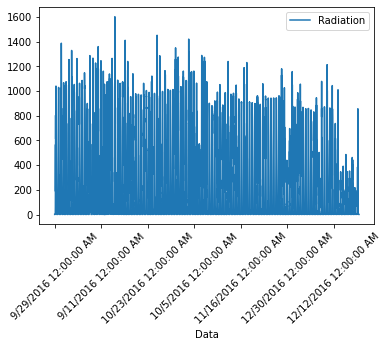

In [ ]:

date_rad.plot(x='Data', y='Radiation', kind="line", rot=45)


In [ ]:
date_rad = date_rad.rename(columns={'Data':'ds', 'Radiation':'y'})

In [ ]:
date_rad.tail()

,ds,y
32681,12/1/2016 12:00:00 AM,1.22
32682,12/1/2016 12:00:00 AM,1.17
32683,12/1/2016 12:00:00 AM,1.20
32684,12/1/2016 12:00:00 AM,1.23
32685,12/1/2016 12:00:00 AM,1.20


In [ ]:
p = Prophet()
p.fit(date_rad)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future = p.make_future_dataframe(periods=1800)
forecast = p.predict(future)

In [ ]:
forecast.shape

(1918, 16)

In [ ]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-09-01,246.359702,-135.613703,629.890676,246.359702,246.359702,-0.097323,-0.097323,-0.097323,-0.097323,-0.097323,-0.097323,0.0,0.0,0.0,246.262379
1,2016-09-02,238.190058,-198.732790,604.931231,238.190058,238.190058,-11.584013,-11.584013,-11.584013,-11.584013,-11.584013,-11.584013,0.0,0.0,0.0,226.606044
2,2016-09-03,230.020413,-219.816587,605.352921,230.020413,230.020413,-18.459640,-18.459640,-18.459640,-18.459640,-18.459640,-18.459640,0.0,0.0,0.0,211.560773
3,2016-09-04,221.850768,-195.387945,633.996495,221.850768,221.850768,-4.653448,-4.653448,-4.653448,-4.653448,-4.653448,-4.653448,0.0,0.0,0.0,217.197320
4,2016-09-05,213.681124,-164.466965,613.767179,213.681124,213.681124,5.121653,5.121653,5.121653,5.121653,5.121653,5.121653,0.0,0.0,0.0,218.802777


In [ ]:
future_=[]
for i in range(1, 13):
    date = '2022-%02d' % i
    future_.append([date])
future_ = pd.DataFrame(future_)
future_.columns = ['ds']

In [ ]:
future_['ds']= pd.to_datetime(future_['ds'])

In [ ]:
future_

,ds
0,2022-01-01
1,2022-02-01
2,2022-03-01
3,2022-04-01
4,2022-05-01
5,2022-06-01
6,2022-07-01
7,2022-08-01
8,2022-09-01
9,2022-10-01


In [ ]:
forecast_ = p.predict(future_)

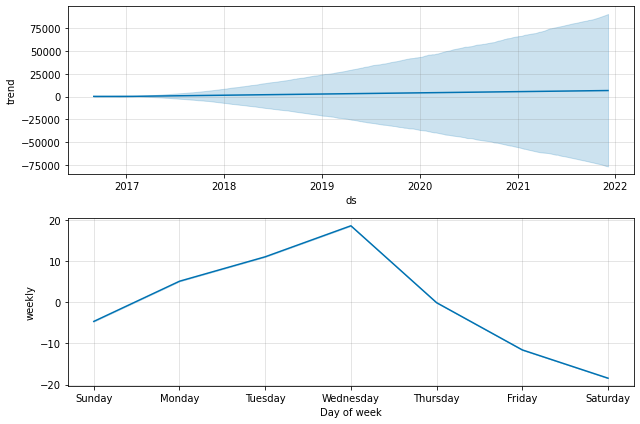

In [ ]:
forecastplot = p.plot_components(forecast)

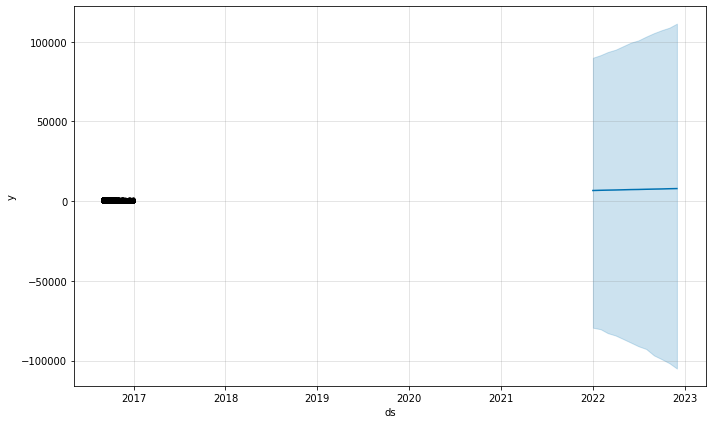

In [ ]:
p.plot(forecast_)
plt.show()